In [5]:
import pandas as pd
people = pd.read_csv('data/people.csv')
sample = pd.read_csv('data/sample_submission.csv')
train = pd.read_csv('data/act_train.csv')
test = pd.read_csv('data/act_test.csv')

In [6]:
data = train.drop('outcome', axis=1)

In [7]:
result = data.append(test, ignore_index=True)

In [8]:
data_out = pd.merge(result, people, how='left', on='people_id')

In [9]:
data_out.shape[0] == train.shape[0] + test.shape[0]

True

In [10]:
check = data_out.drop('activity_id', axis=1)

In [11]:
from sklearn.preprocessing import LabelEncoder
for column in check.columns:
    if check[column].dtype.name == 'object' or check[column].dtype.name == 'bool':
        en = LabelEncoder()
        check[column] = en.fit_transform(check[column])
    

/home/ubuntu/anaconda2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [12]:
check_join = pd.concat([data_out[['activity_id']], check], axis=1)

In [13]:
train_data = check_join[0:train.shape[0]]

In [14]:
test_data = check_join[train.shape[0]:]

In [15]:
train_data

,activity_id,people_id,date_x,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,act2_1734928,0,405,3,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,36
1,act2_2434093,0,72,1,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,36
2,act2_3404049,0,72,1,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,36
3,act2_3651215,0,383,1,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,36
4,act2_4109017,0,405,1,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,36
5,act2_898576,0,383,3,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,36
6,act2_1233489,1,129,1,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,0,76
7,act2_1623405,1,129,1,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,0,76
8,act2_1111598,2,205,1,0,0,0,0,0,0,...,0,0,1,1,1,1,0,1,1,99
9,act2_1177453,2,346,1,0,0,0,0,0,0,...,0,0,1,1,1,1,0,1,1,99


In [16]:
train_data.shape[0] == train.shape[0]

True

In [17]:
test_data.shape[0] == test_data.shape[0]

True

In [18]:
training = train_data.drop('activity_id', axis =1)
label = train['outcome']

In [19]:
training.shape[0] == label.shape[0]

True

In [20]:
from sklearn.preprocessing import StandardScaler, Imputer
impute = Imputer()
training = pd.DataFrame(impute.fit_transform(training), index=training.index)
std = StandardScaler()
training = pd.DataFrame(std.fit_transform(training), index=training.index)

In [21]:
from time import time
from sklearn.cross_validation import train_test_split
training_data, testing_data, training_label, testing_label = train_test_split(training, label, 
                                                                        random_state=int(time()), test_size=0.3, stratify=label)

In [22]:
training_data

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
718285,-0.566400,1.228059,-0.759042,-0.210644,-0.227097,-0.244006,-0.258705,-0.232454,-0.256202,-0.234110,...,-0.441534,-0.505946,-0.605807,-0.605081,-0.521910,-0.727039,-0.502079,-0.699059,-0.609448,0.471643
272345,-1.340065,-1.595581,-0.759042,-0.210644,-0.227097,-0.244006,-0.258705,-0.232454,-0.256202,-0.234110,...,-0.441534,-0.505946,-0.605807,-0.605081,-0.521910,-0.727039,-0.502079,-0.699059,-0.609448,0.443931
1750511,0.989682,0.465404,0.762950,-0.210644,-0.227097,-0.244006,-0.258705,-0.232454,-0.256202,-0.234110,...,-0.441534,-0.505946,-0.605807,-0.605081,-0.521910,-0.727039,-0.502079,-0.699059,-0.609448,0.388507
1302229,0.317913,2.036111,-0.759042,-0.210644,-0.227097,-0.244006,-0.258705,-0.232454,-0.256202,-0.234110,...,-0.441534,-0.505946,-0.605807,-0.605081,-0.521910,-0.727039,-0.502079,-0.699059,-0.609448,0.305371
949559,-0.190148,0.002363,1.523946,-0.210644,-0.227097,-0.244006,-0.258705,-0.232454,-0.256202,-0.234110,...,2.264832,-0.505946,-0.605807,1.652672,-0.521910,1.375441,1.991719,1.430494,1.640828,1.081305
1123341,0.103968,0.474483,-0.759042,-0.210644,-0.227097,-0.244006,-0.258705,-0.232454,-0.256202,-0.234110,...,-0.441534,-0.505946,-0.605807,-0.605081,-0.521910,-0.727039,-0.502079,-0.699059,-0.609448,-0.498274
2171261,1.668347,1.400565,-1.520038,5.998519,2.262610,0.380743,3.606831,0.672774,3.296927,6.154595,...,-0.441534,-0.505946,-0.605807,1.652672,-0.521910,-0.727039,-0.502079,-0.699059,-0.609448,0.721050
1768831,1.022089,-1.059907,1.523946,-0.210644,-0.227097,-0.244006,-0.258705,-0.232454,-0.256202,-0.234110,...,-0.441534,-0.505946,-0.605807,-0.605081,-0.521910,-0.727039,-0.502079,-0.699059,-0.609448,-1.385056
798800,-0.430096,1.899922,-0.759042,-0.210644,-0.227097,-0.244006,-0.258705,-0.232454,-0.256202,-0.234110,...,-0.441534,-0.505946,-0.605807,-0.605081,-0.521910,-0.727039,-0.502079,-0.699059,-0.609448,-1.385056
1391555,0.476526,0.174869,-0.759042,-0.210644,-0.227097,-0.244006,-0.258705,-0.232454,-0.256202,-0.234110,...,2.264832,-0.505946,-0.605807,-0.605081,-0.521910,-0.727039,-0.502079,1.430494,-0.609448,-0.082596


In [23]:
from xgboost import XGBClassifier
gbm = XGBClassifier()

In [24]:
gbm.set_params(**{'n_estimators':400, 'learning_rate':0.9})
gbm.fit(training_data, training_label,
       eval_set=[(training_data, training_label), (testing_data, testing_label)],
       eval_metric='auc', verbose=True)

[0]	validation_0-auc:0.891167	validation_1-auc:0.891492
[1]	validation_0-auc:0.899427	validation_1-auc:0.899702
[2]	validation_0-auc:0.902108	validation_1-auc:0.902195
[3]	validation_0-auc:0.909441	validation_1-auc:0.909524
[4]	validation_0-auc:0.918164	validation_1-auc:0.918241
[5]	validation_0-auc:0.919792	validation_1-auc:0.919924
[6]	validation_0-auc:0.921201	validation_1-auc:0.921341
[7]	validation_0-auc:0.922195	validation_1-auc:0.922304
[8]	validation_0-auc:0.923426	validation_1-auc:0.923589
[9]	validation_0-auc:0.924054	validation_1-auc:0.92429
[10]	validation_0-auc:0.924779	validation_1-auc:0.925065
[11]	validation_0-auc:0.925328	validation_1-auc:0.925622
[12]	validation_0-auc:0.92571	validation_1-auc:0.925923
[13]	validation_0-auc:0.926882	validation_1-auc:0.927005
[14]	validation_0-auc:0.927962	validation_1-auc:0.92803
[15]	validation_0-auc:0.928683	validation_1-auc:0.928746
[16]	validation_0-auc:0.929319	validation_1-auc:0.929327
[17]	validation_0-auc:0.930072	validation_1-

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.9, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

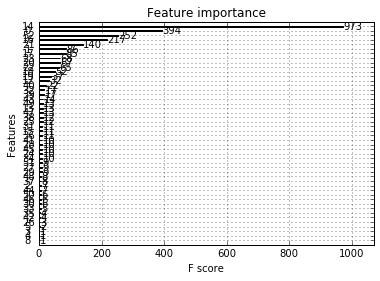

In [25]:
# plot the important feature
import xgboost
%matplotlib inline
xgboost.plot_importance(gbm.booster())

In [26]:
result = gbm.booster().get_fscore()
se = pd.Series(result)
important_feature = pd.to_numeric(se[lambda x: x>10].index) 
training_important = training[important_feature]

In [27]:
important_feature

Int64Index([ 0,  1, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 31, 32,
            36, 38, 39, 40, 43, 47, 49, 52],
           dtype='int64')

In [26]:
from time import time
from sklearn.cross_validation import train_test_split
training_data, testing_data, training_label, testing_label = train_test_split(training_important, label, random_state=int(time()), 
                                                                  test_size=0.3, stratify=label)

In [27]:
gbm.set_params(**{'n_estimators':10000, 'learning_rate':0.9})
gbm.fit(training_data, training_label, 
        eval_set = [(training_data, training_label), (testing_data, testing_label)],
        eval_metric = 'auc', verbose=True)

[0]	validation_0-auc:0.891375	validation_1-auc:0.891006
[1]	validation_0-auc:0.899495	validation_1-auc:0.89943
[2]	validation_0-auc:0.902142	validation_1-auc:0.902273
[3]	validation_0-auc:0.909405	validation_1-auc:0.909582
[4]	validation_0-auc:0.917973	validation_1-auc:0.918379
[5]	validation_0-auc:0.918846	validation_1-auc:0.91916
[6]	validation_0-auc:0.919726	validation_1-auc:0.920028
[7]	validation_0-auc:0.920715	validation_1-auc:0.920926
[8]	validation_0-auc:0.92157	validation_1-auc:0.921777
[9]	validation_0-auc:0.922959	validation_1-auc:0.923135
[10]	validation_0-auc:0.923563	validation_1-auc:0.923757
[11]	validation_0-auc:0.924115	validation_1-auc:0.924357
[12]	validation_0-auc:0.924412	validation_1-auc:0.924604
[13]	validation_0-auc:0.925548	validation_1-auc:0.925706
[14]	validation_0-auc:0.926408	validation_1-auc:0.926548
[15]	validation_0-auc:0.92817	validation_1-auc:0.928194
[16]	validation_0-auc:0.92888	validation_1-auc:0.928859
[17]	validation_0-auc:0.929433	validation_1-au

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.9, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=10000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [28]:
from sklearn.preprocessing import StandardScaler, Imputer
impute = Imputer()
total_data = pd.DataFrame(impute.fit_transform(check), index=check.index)
std = StandardScaler()
total_data = pd.DataFrame(std.fit_transform(total_data), index=total_data.index)
total_data = total_data[important_feature]
training_all = total_data[0:train.shape[0]]
testing_all = total_data[train.shape[0]:]

In [29]:
gbm.set_params(**{'n_estimators':10000, 'learning_rate':0.9})
gbm.fit(training_all, label,
       eval_set=[(training_all, label)],
       eval_metric='auc', verbose=True)

[0]	validation_0-auc:0.891264
[1]	validation_0-auc:0.89951
[2]	validation_0-auc:0.902142
[3]	validation_0-auc:0.910202
[4]	validation_0-auc:0.918268
[5]	validation_0-auc:0.919374
[6]	validation_0-auc:0.920816
[7]	validation_0-auc:0.921682
[8]	validation_0-auc:0.922962
[9]	validation_0-auc:0.923995
[10]	validation_0-auc:0.924619
[11]	validation_0-auc:0.925388
[12]	validation_0-auc:0.926255
[13]	validation_0-auc:0.927233
[14]	validation_0-auc:0.927581
[15]	validation_0-auc:0.928091
[16]	validation_0-auc:0.928567
[17]	validation_0-auc:0.929233
[18]	validation_0-auc:0.930117
[19]	validation_0-auc:0.931031
[20]	validation_0-auc:0.931198
[21]	validation_0-auc:0.931517
[22]	validation_0-auc:0.932059
[23]	validation_0-auc:0.932353
[24]	validation_0-auc:0.933235
[25]	validation_0-auc:0.933897
[26]	validation_0-auc:0.934378
[27]	validation_0-auc:0.934999
[28]	validation_0-auc:0.935829
[29]	validation_0-auc:0.936246
[30]	validation_0-auc:0.936586
[31]	validation_0-auc:0.936863
[32]	validation_0-a

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.9, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=10000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [30]:
outcome = gbm.predict_proba(testing_all)[:,1]

In [31]:
outcome_test = gbm.predict_proba(training_all)[:,1]

In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(label,outcome_test)

0.99986681957075674

In [33]:
outcome.size

498687

In [34]:
result = pd.concat([test[['activity_id']], pd.DataFrame(outcome, columns=['outcome'])], axis=1)

In [35]:
result.columns = sample.columns

In [36]:
result.to_csv('result/submit1.csv', index=None)